In [128]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust my plots

#Reading data
df = pd.read_csv("C:/Users/angel/Documents/average score by genre and year.csv")
df2 = pd.read_csv("C:/Users/angel/Documents/average recovery perc by gender and year.csv")

In [96]:
#Visualizing data
df.head(10)

,year,genre,average score by genre and year
0,1980,Action,6.178571
1,1981,Action,6.535294
2,1982,Action,6.219048
3,1983,Action,5.496774
4,1984,Action,6.248387
5,1985,Action,6.035714
6,1986,Action,5.634783
7,1987,Action,5.884615
8,1988,Action,6.148387
9,1989,Action,5.941667


In [124]:
genres = df['genre'].unique()
print(len(genres))
genres

19


array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'Western'], dtype=object)

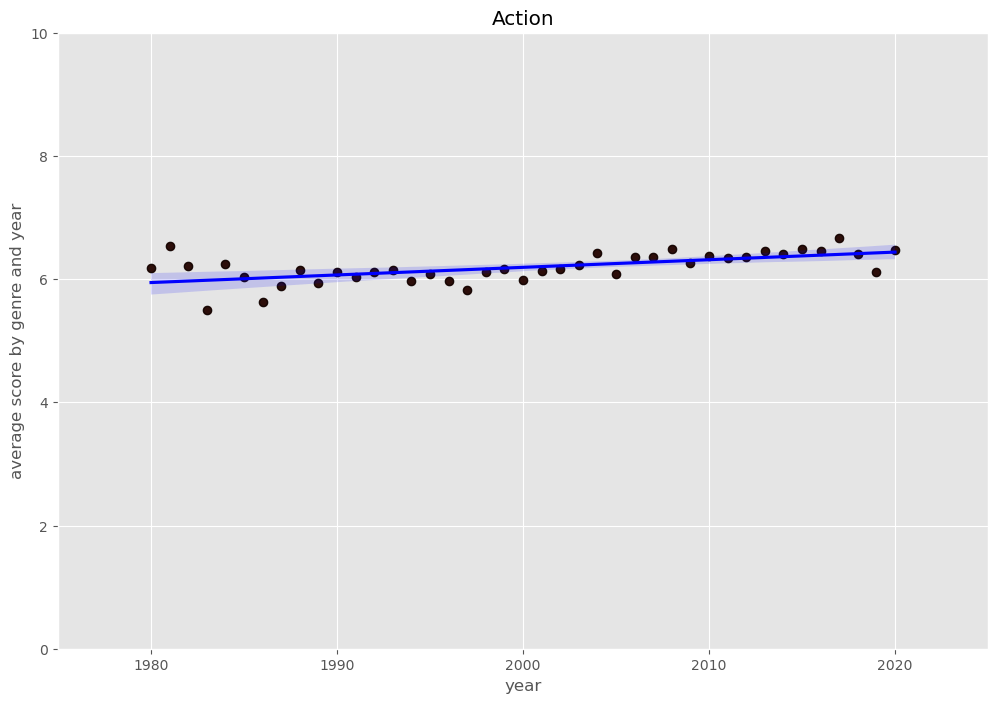

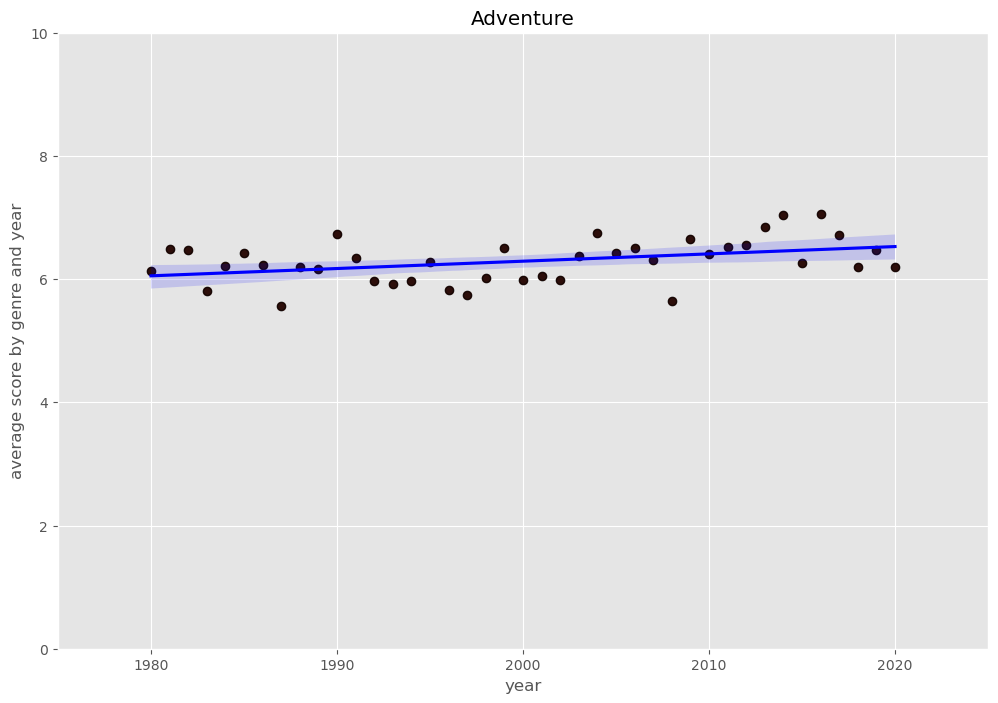

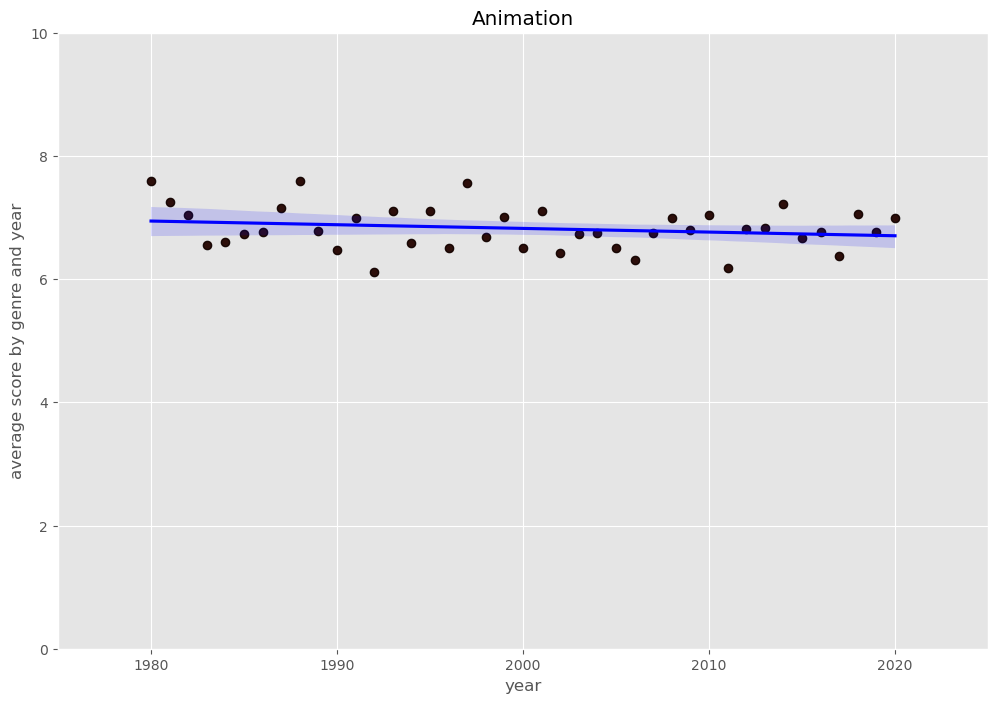

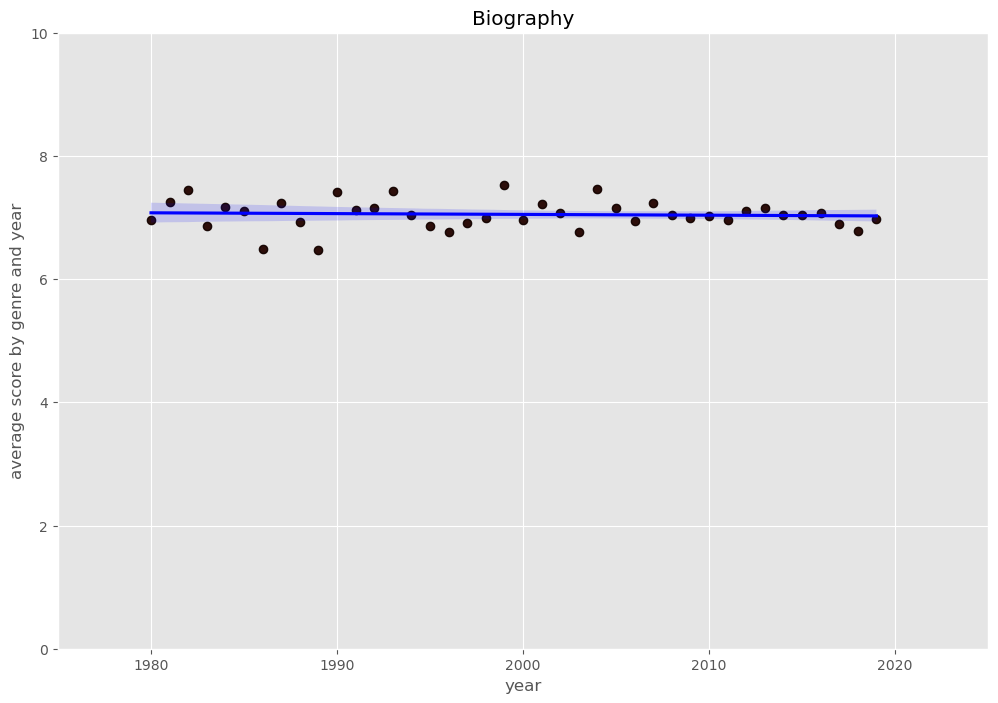

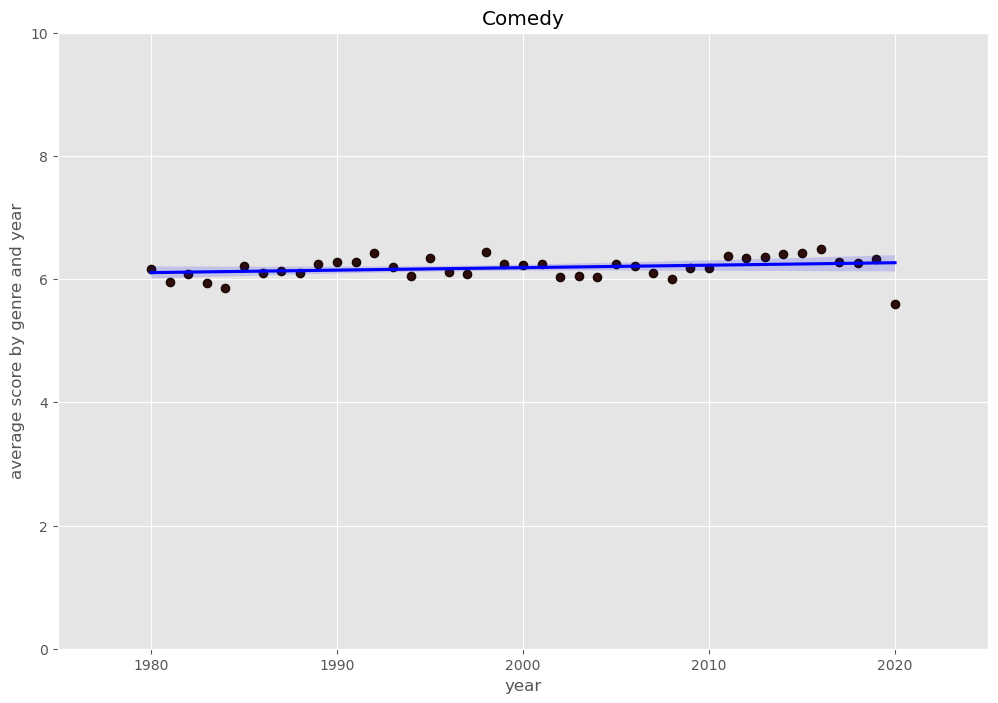

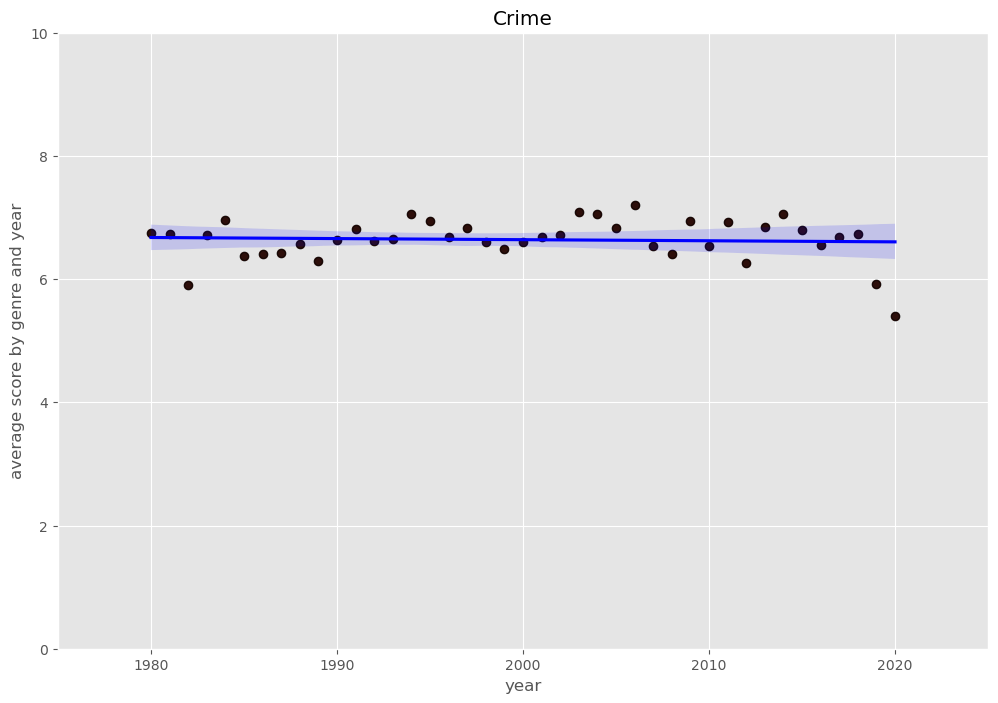

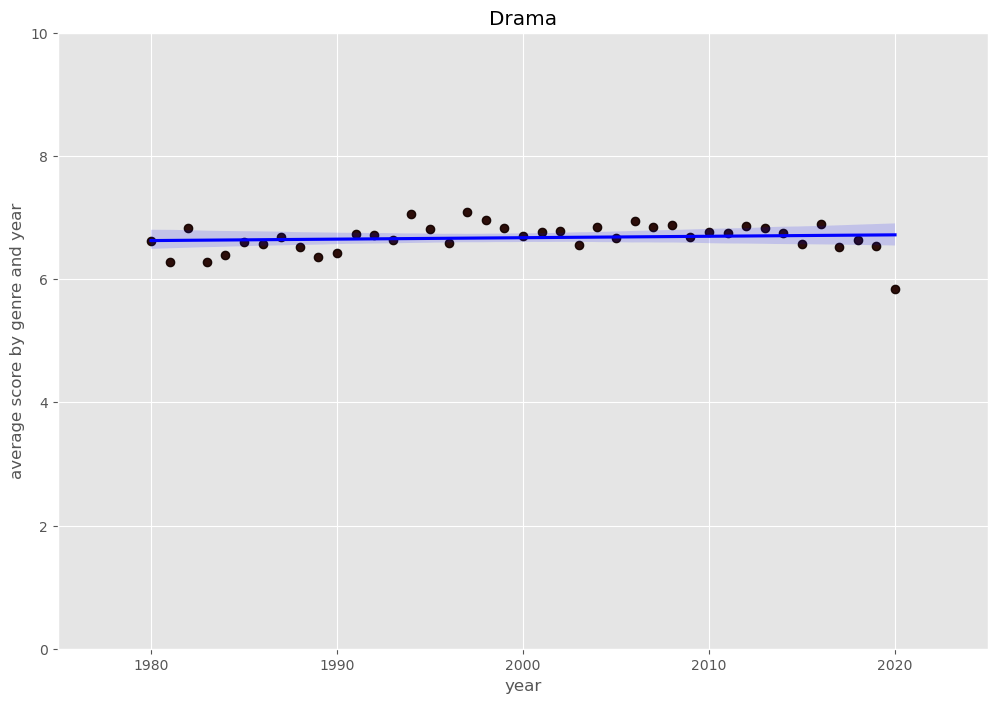

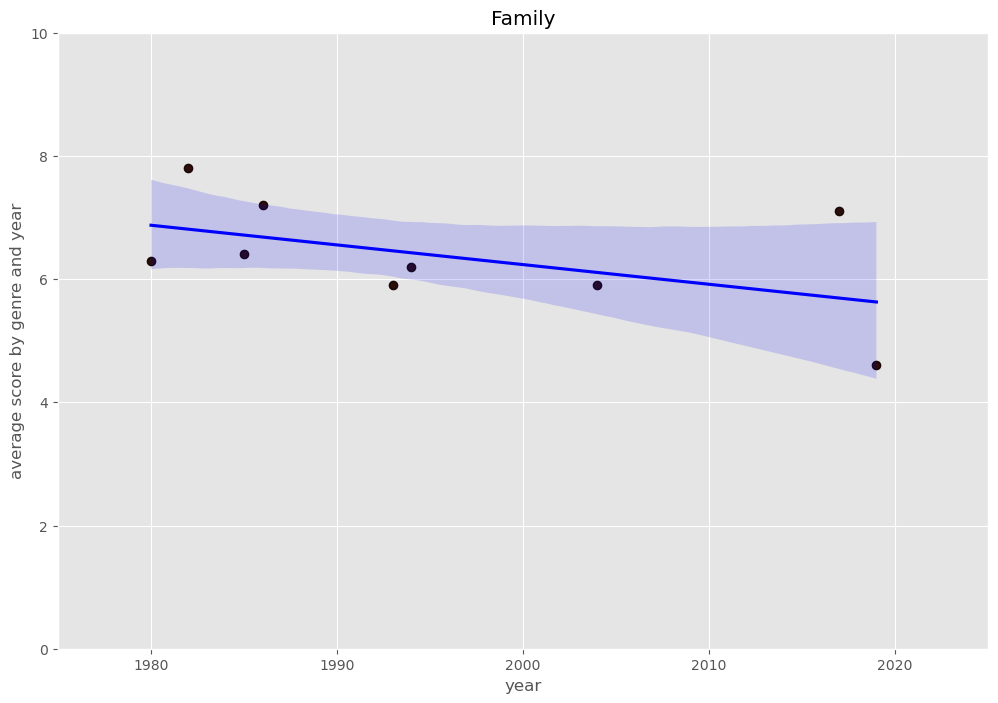

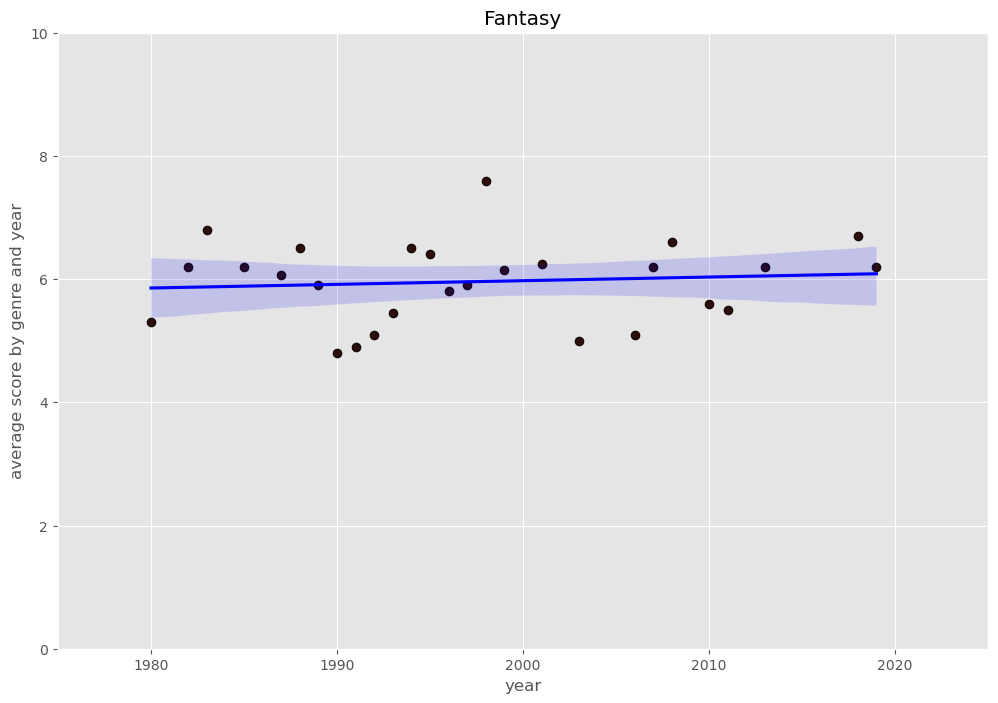

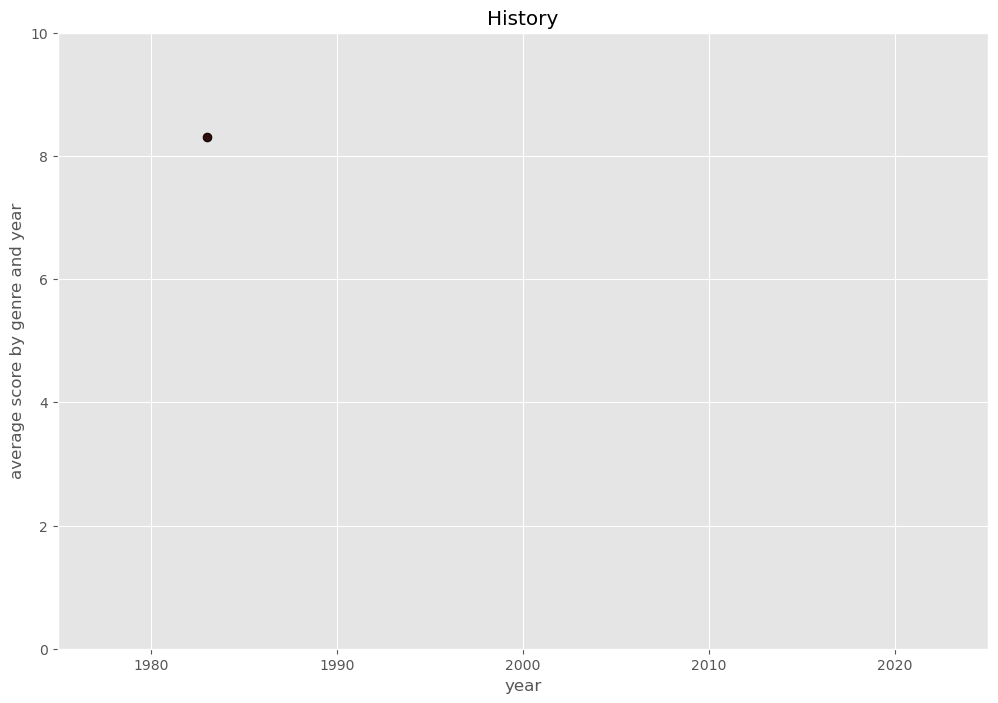

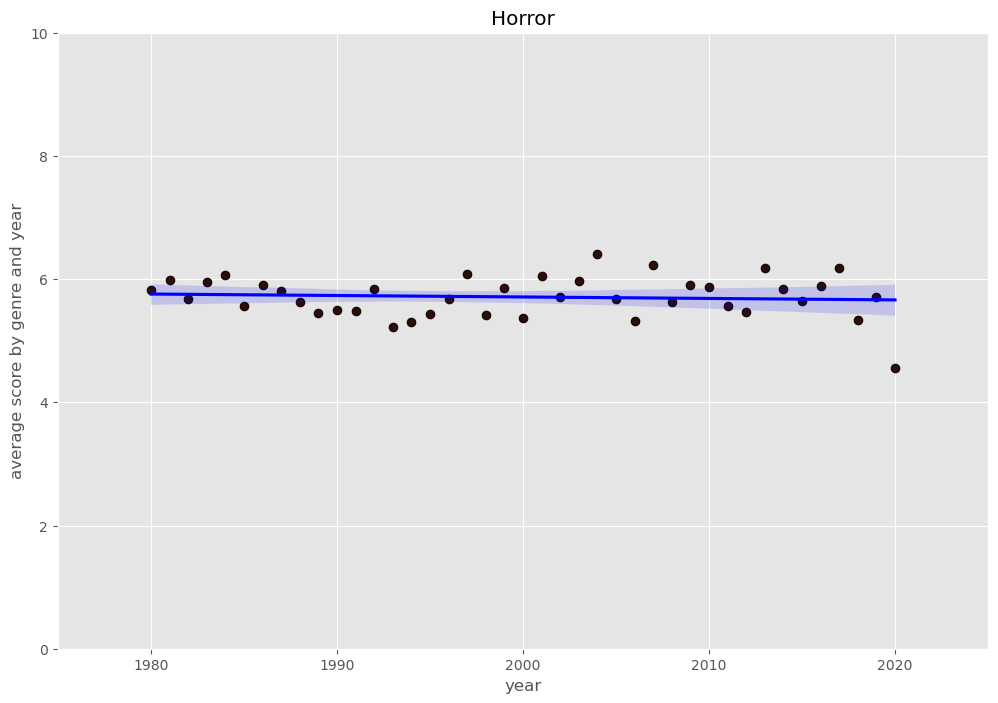

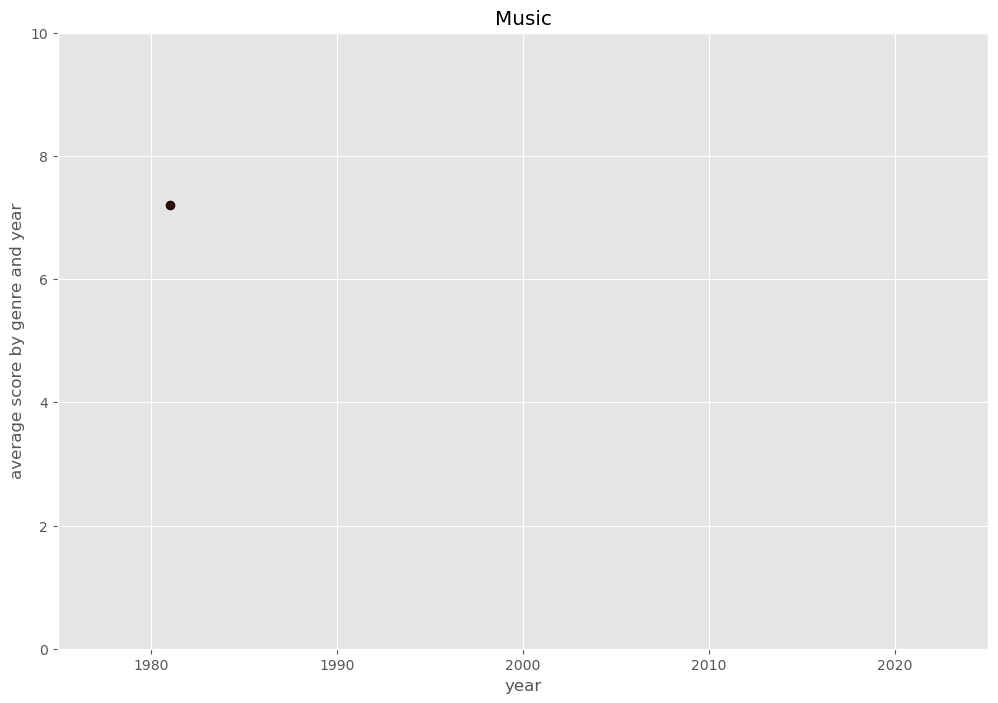

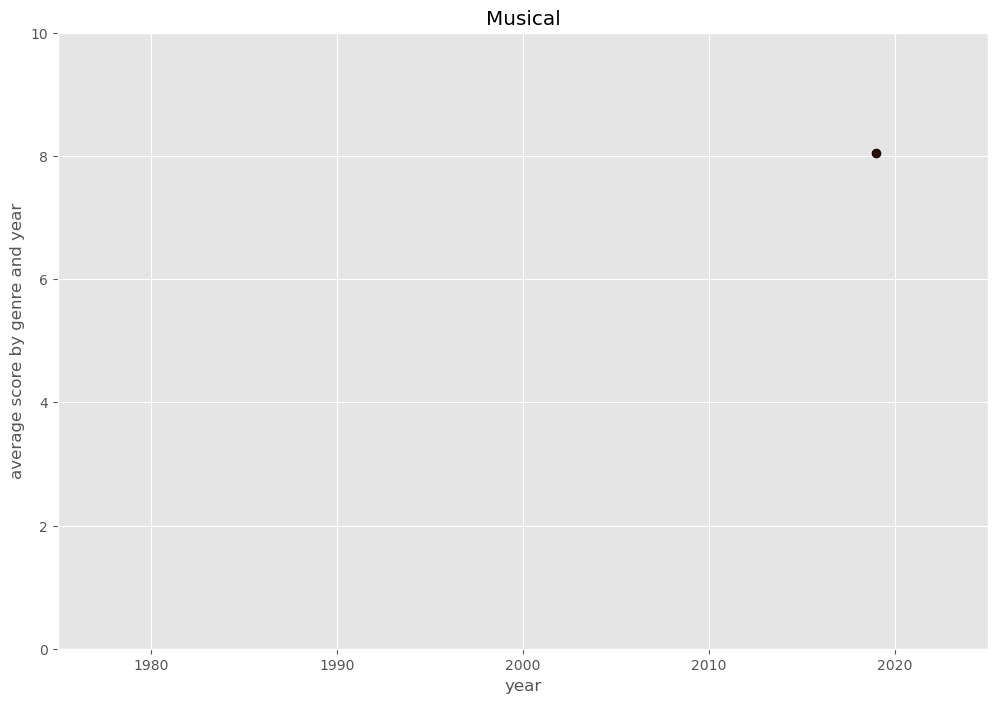

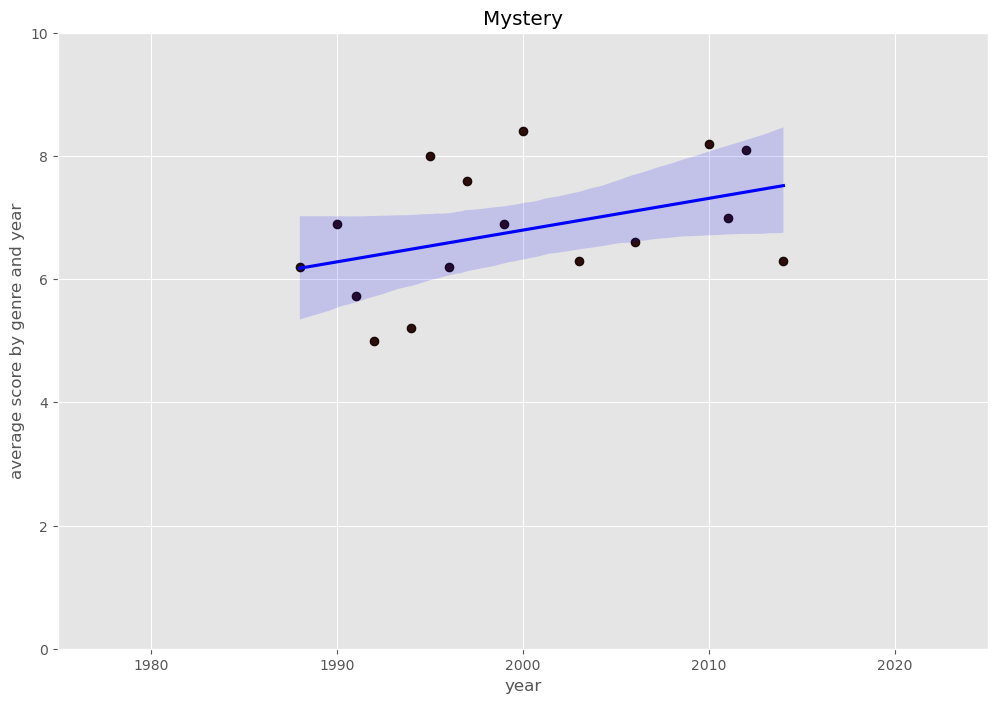

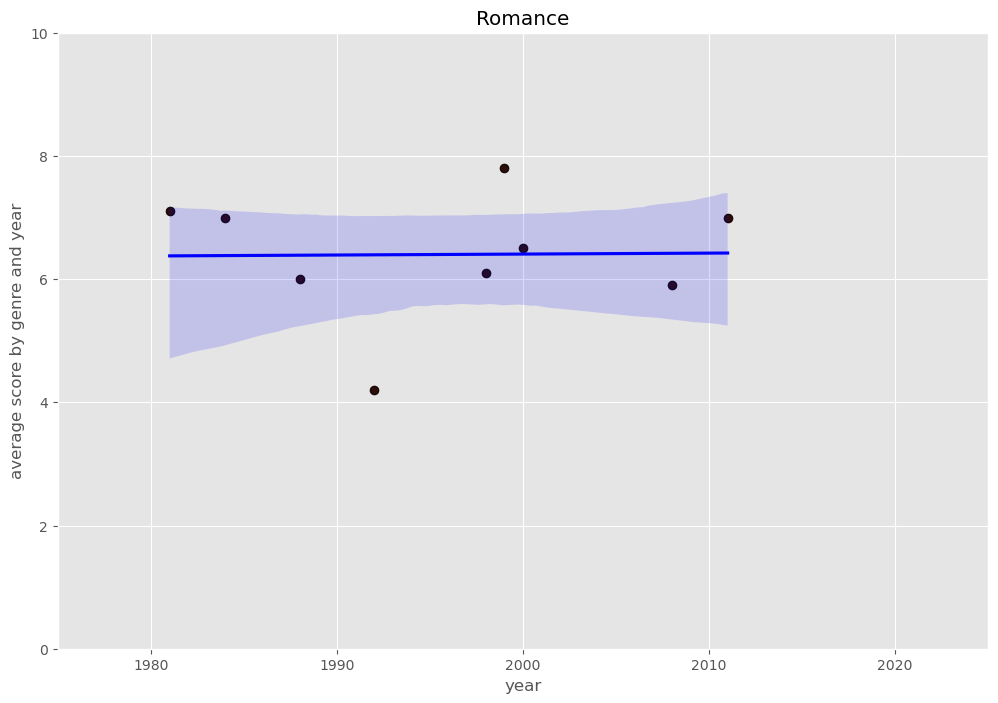

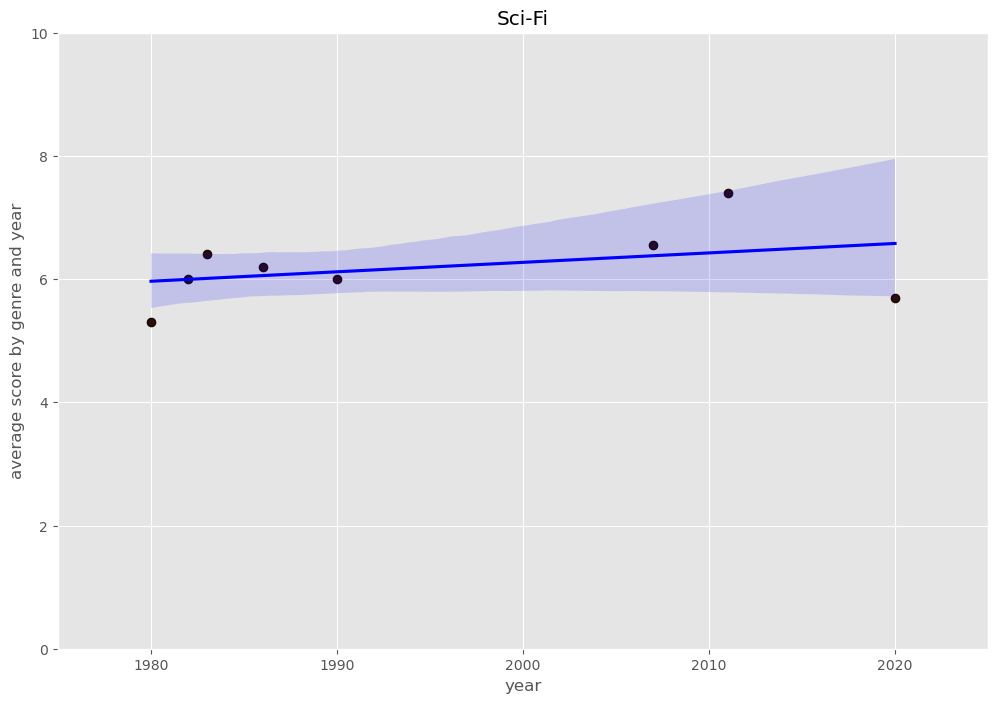

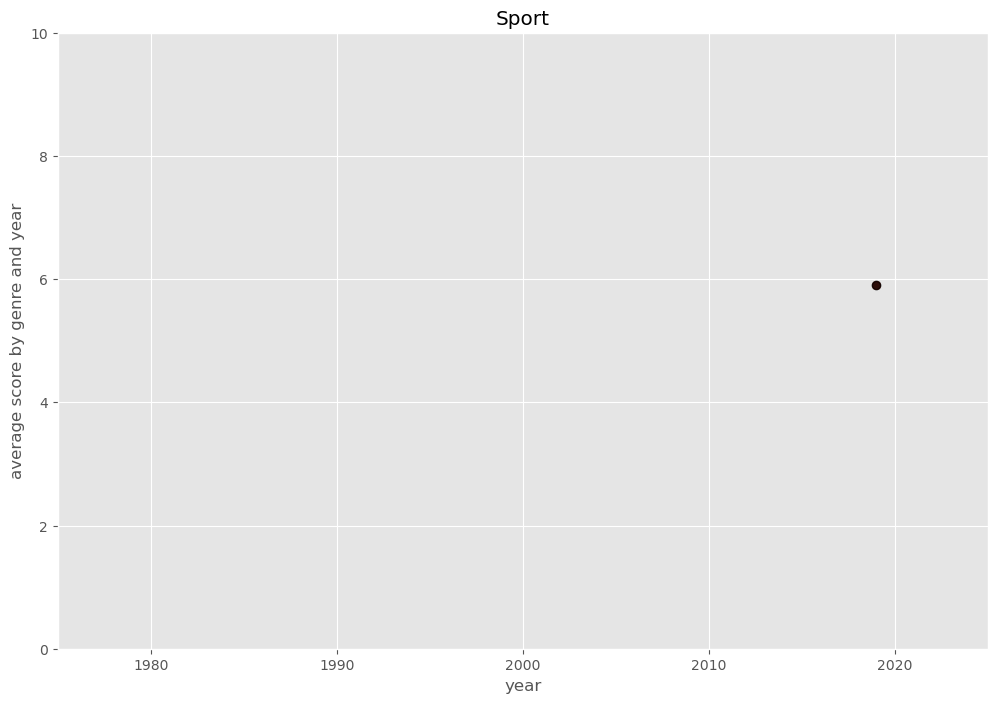

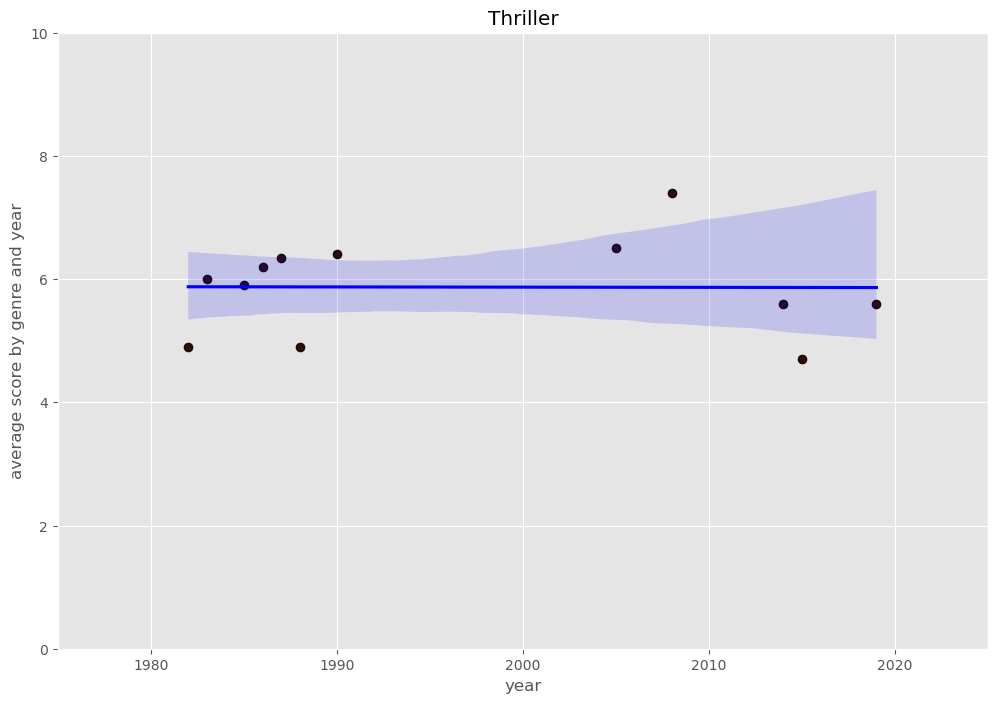

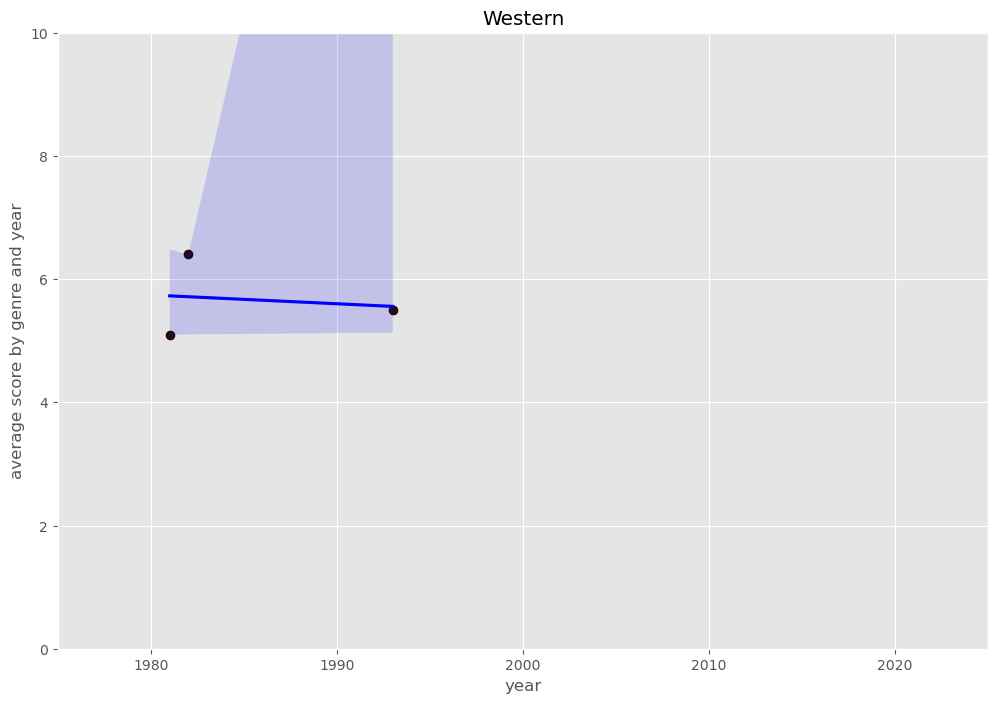

In [149]:
#Averega genre score by year showing some tendency
#This data don't contain outliers
for idx in range(0,len(genres)):
    C = df[df['genre']==genres[idx]].reset_index()
    plt.scatter(C['year'],C['average score by genre and year'])
    plt.title(genres[idx])
    plt.xlim([1975, 2025])
    plt.ylim([0, 10])
    sns.regplot(x = 'year', y = 'average score by genre and year', data=C, scatter_kws = {'color': 'black'}, line_kws ={'color': 'blue'})
    plt.show()
    
    
    

In [133]:
genres2 = df2['genre'].unique()
print(len(genres2))
genres2

15


array(['Action', 'Adventure', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Fantasy', 'Horror', 'Animation', 'Family', 'Sci-Fi', 'Western',
       'Romance', 'Thriller', 'Mystery'], dtype=object)

In [138]:
df2.head()

,year,genre,average recovery perc by gender and year
0,1980,Action,402.125837
1,1980,Adventure,369.770070
2,1980,Biography,43.982687
3,1980,Comedy,459.045046
4,1980,Crime,289.293959


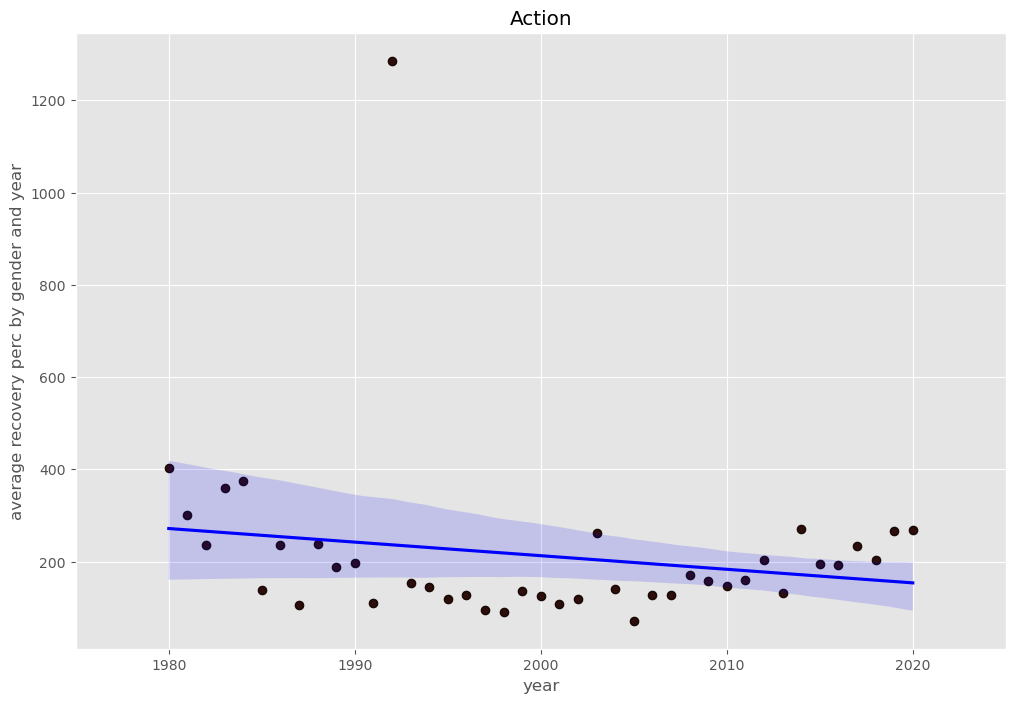

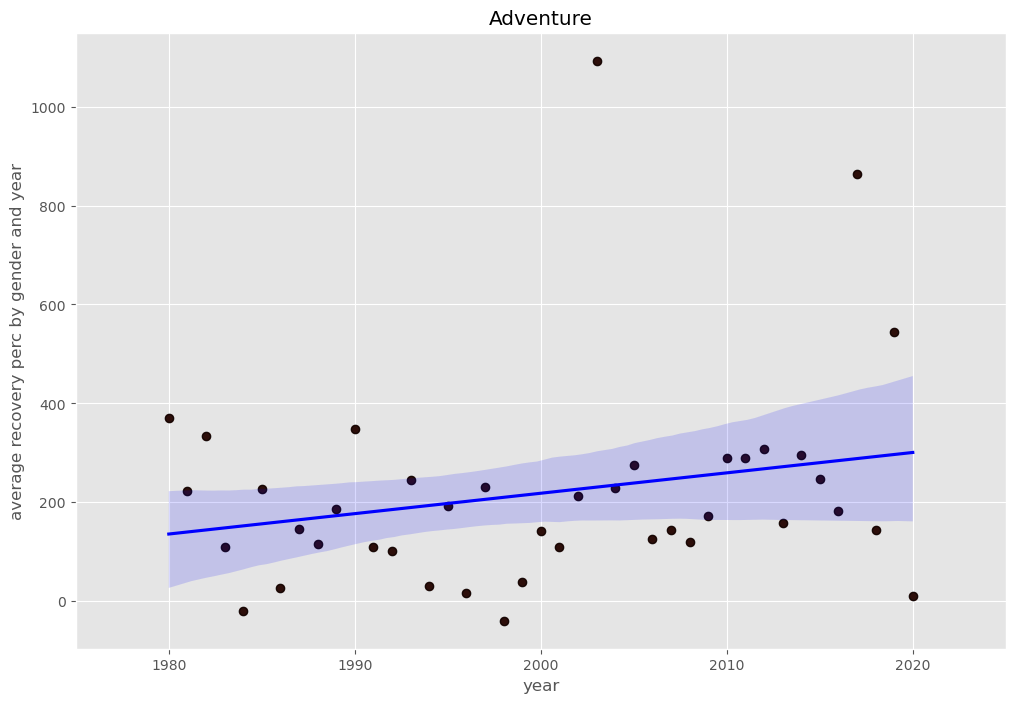

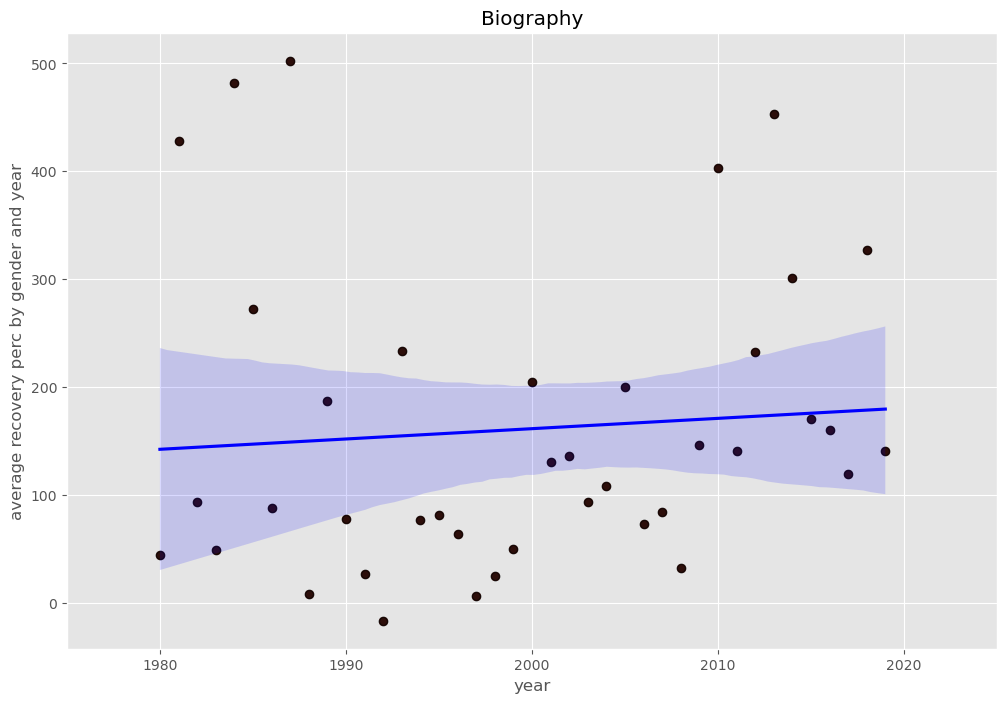

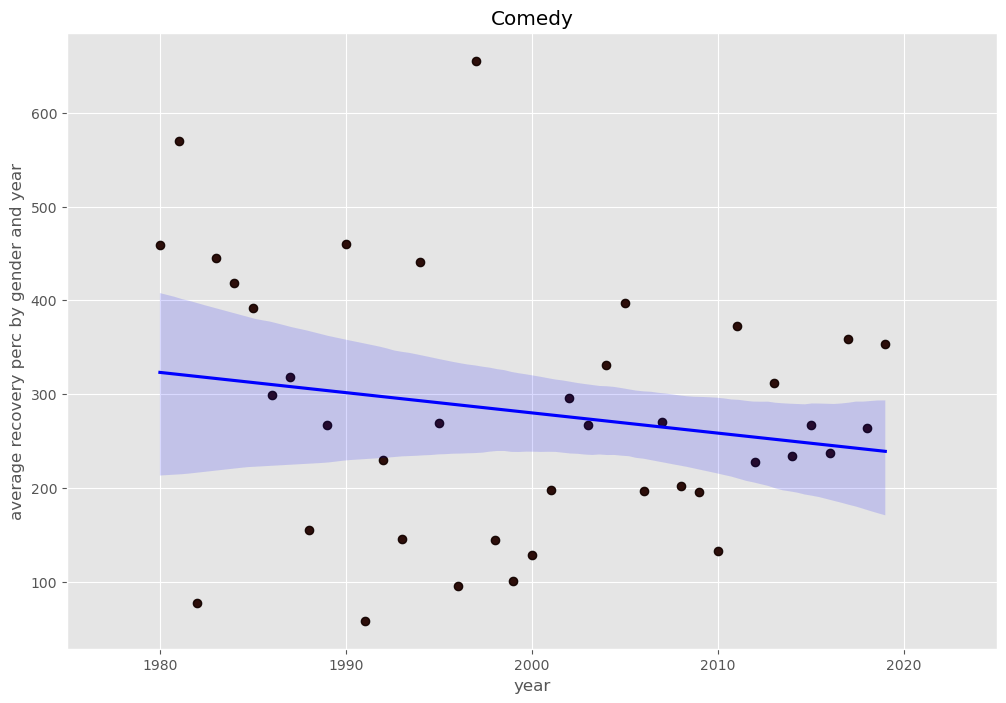

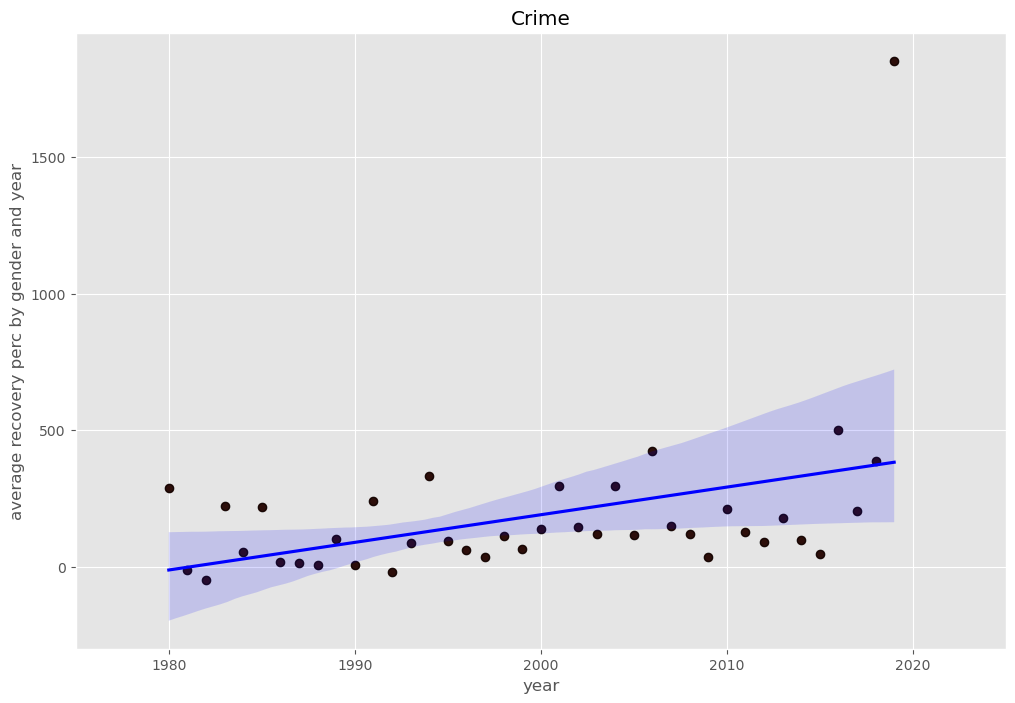

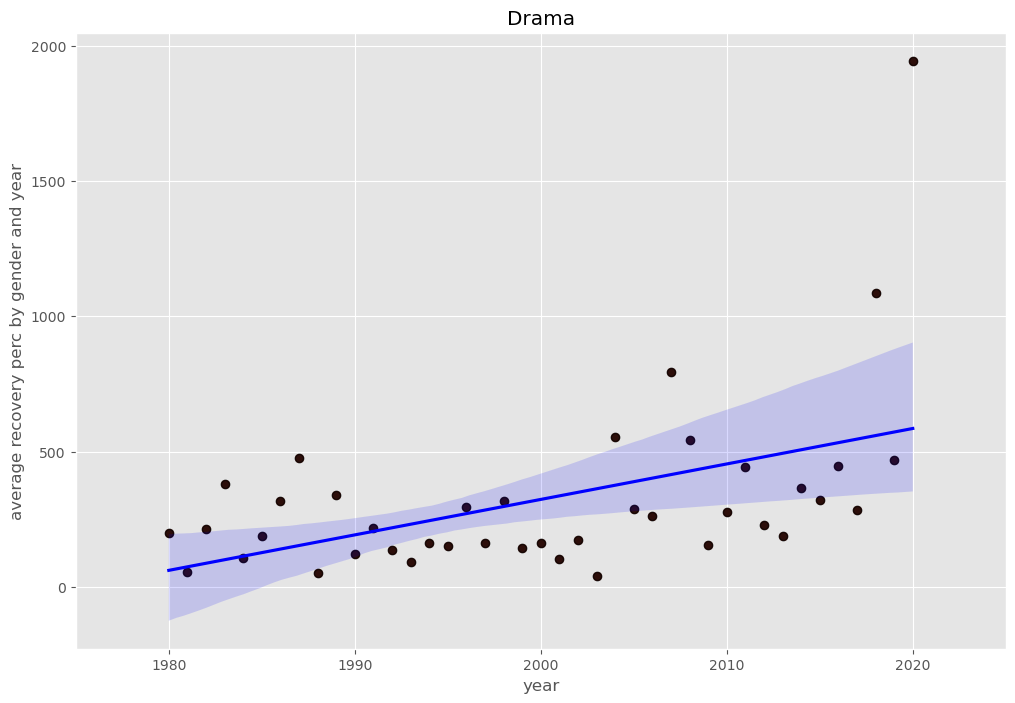

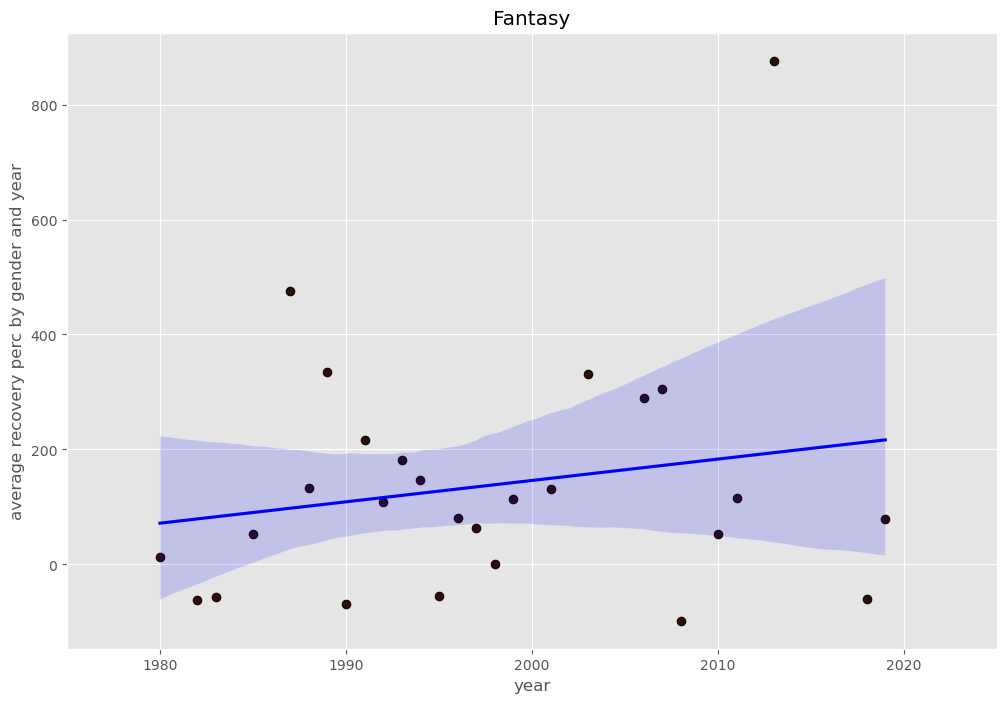

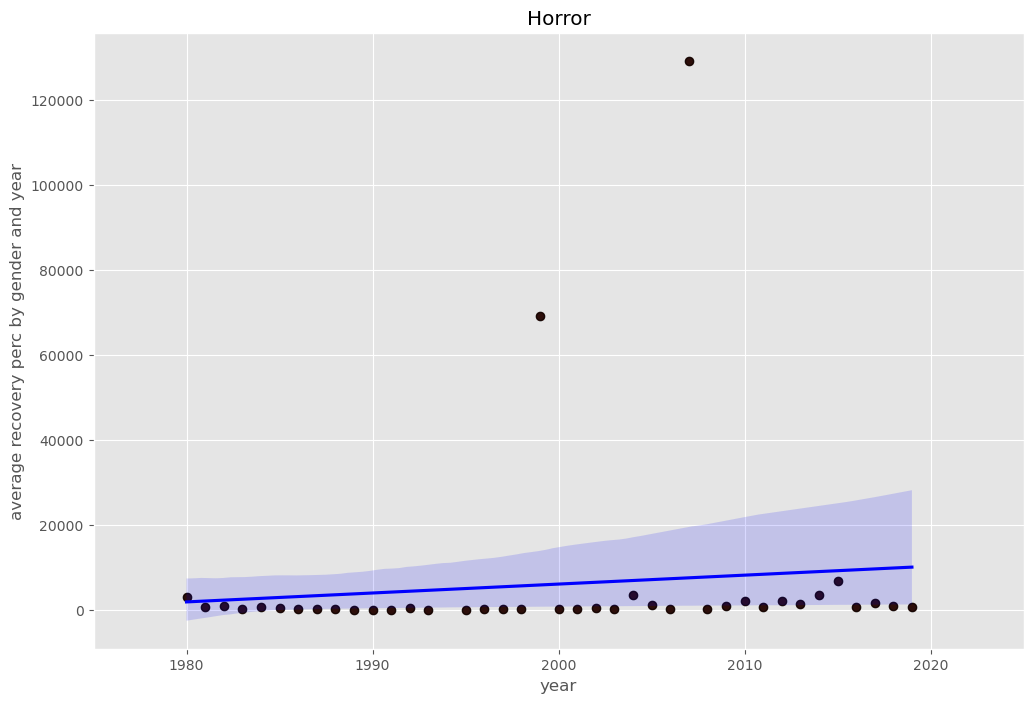

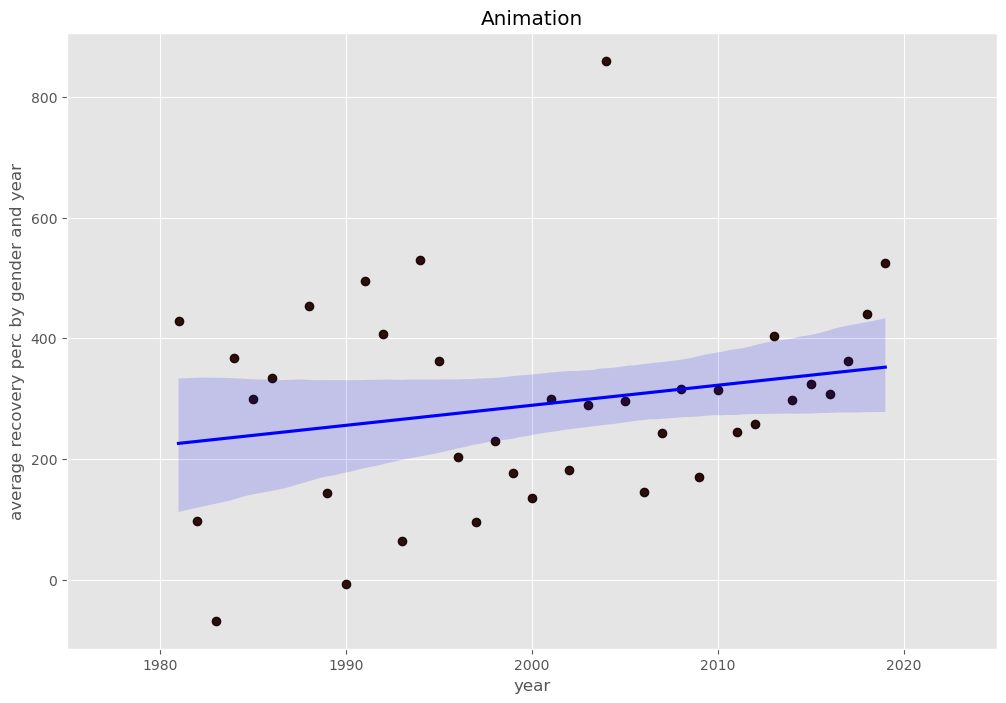

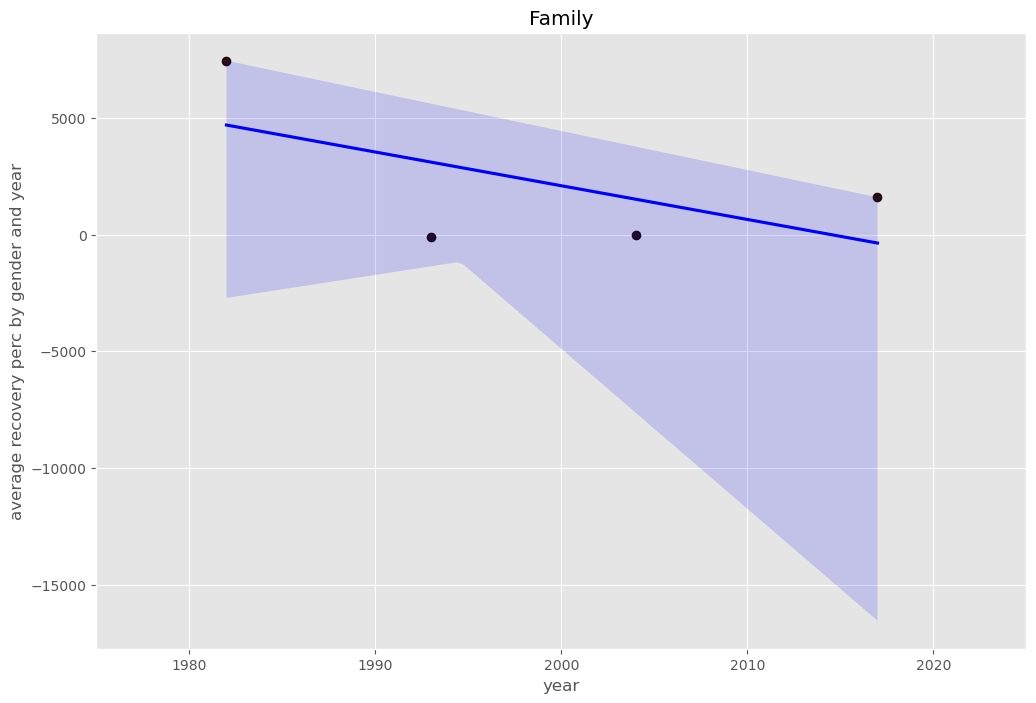

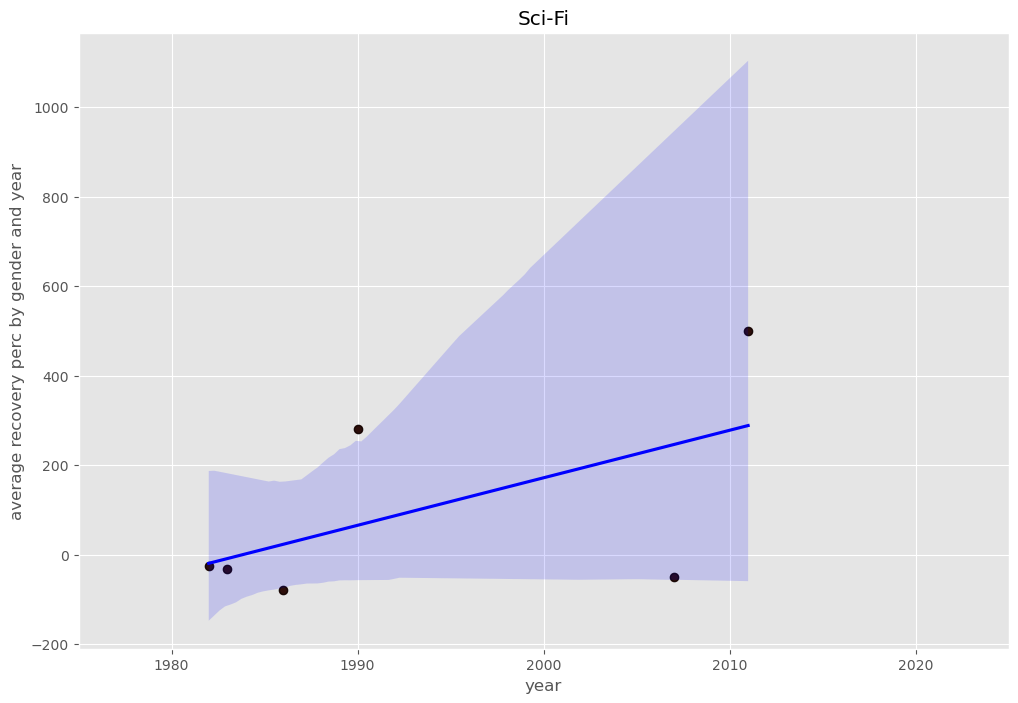

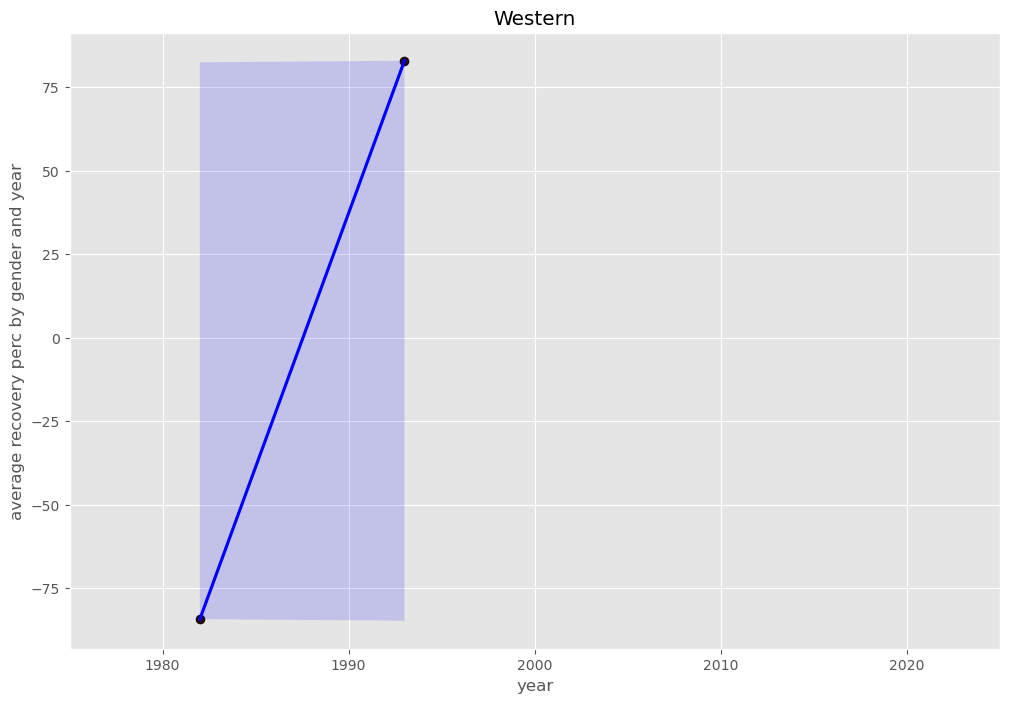

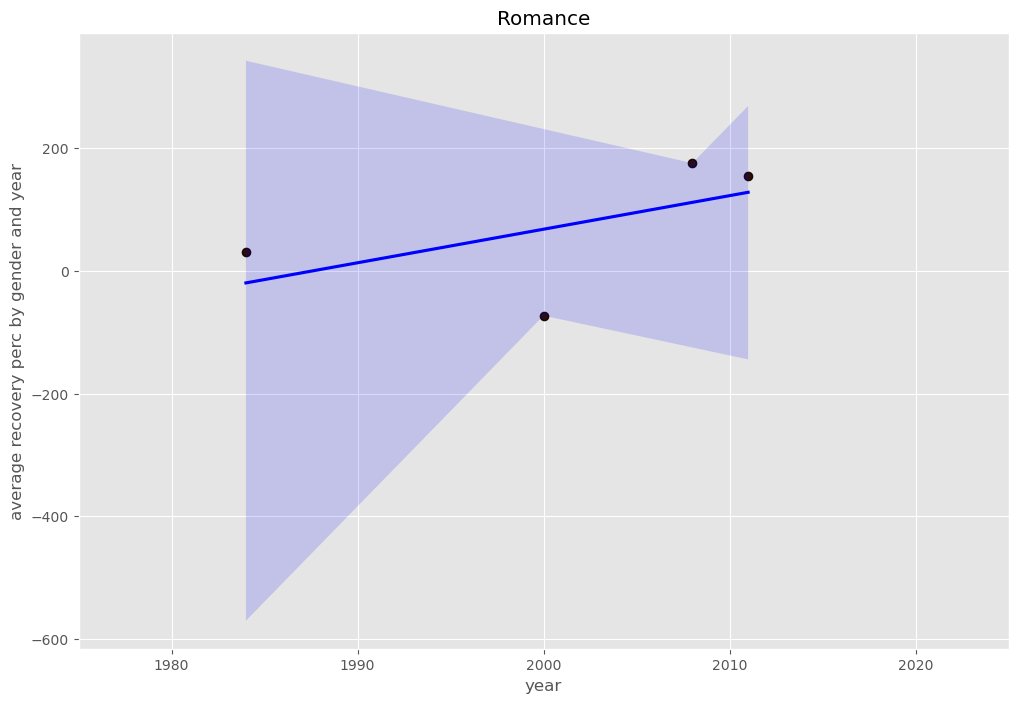

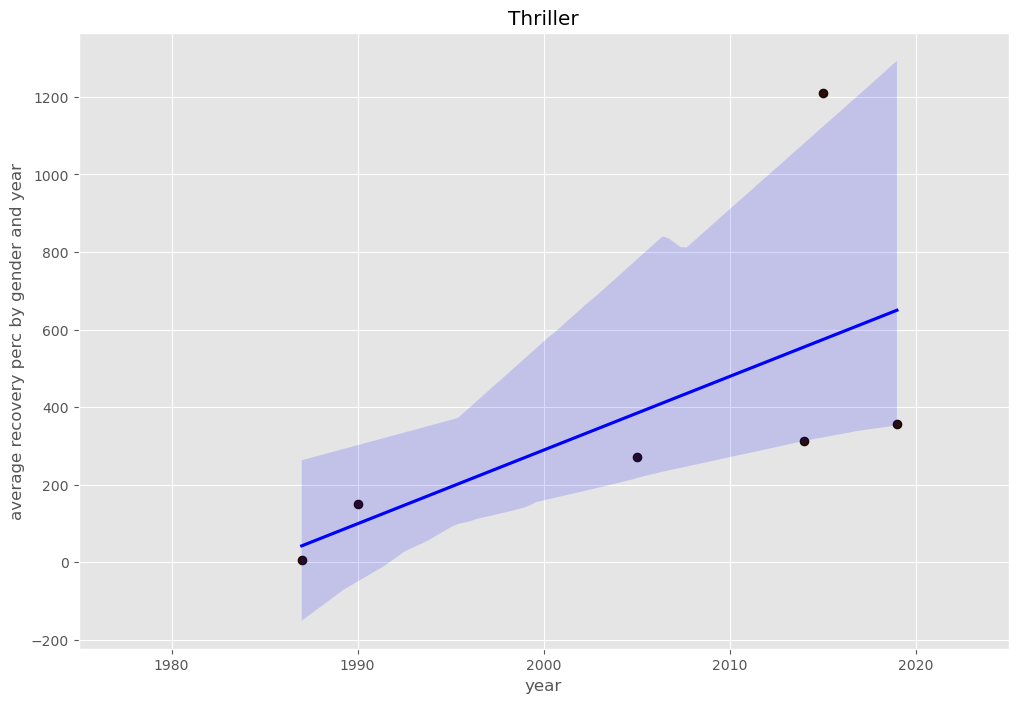

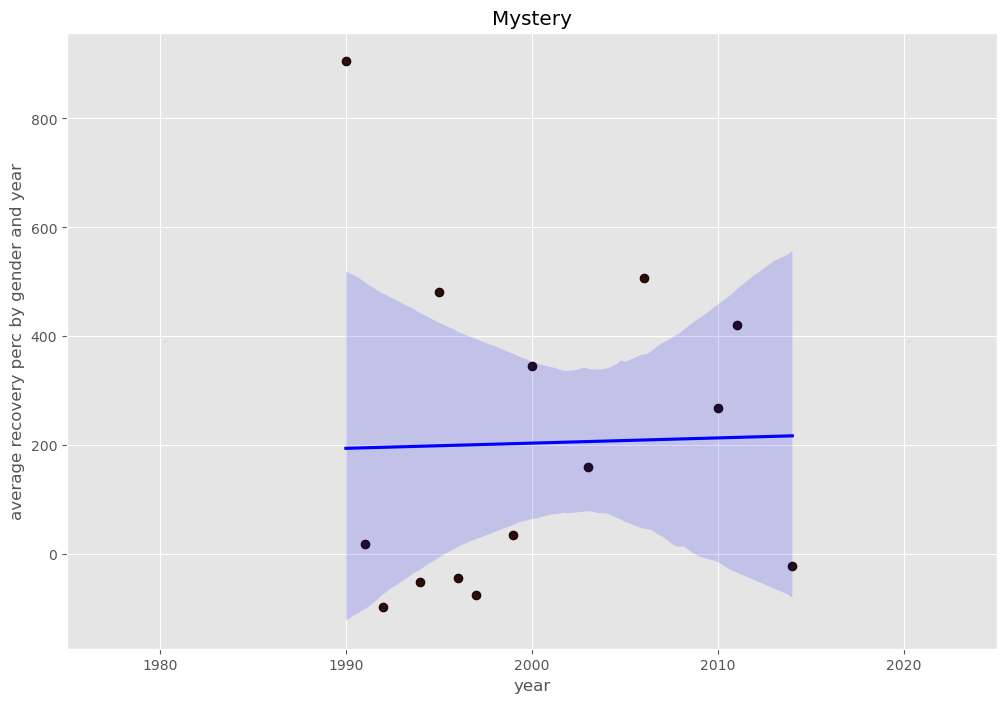

In [225]:
#Budget recovery percent from every genre by year showing some tendency
#Data contain outliers which I can't eliminate without affecting the other data yet

for idx in range(0,len(genres2)):
    C = df2[df2['genre']==genres2[idx]].reset_index()
    plt.scatter(C['year'],C['average recovery perc by gender and year'])
    plt.title(genres2[idx])
    plt.xlim([1975, 2025])
    sns.regplot(x = 'year', y = 'average recovery perc by gender and year', data=C, scatter_kws = {'color': 'black'}, line_kws ={'color': 'blue'})
    plt.show()

In [ ]:
"""
Trying to remove outliers from my data but the problems comes from bad cleaning of raw data, need to practice it and see
and statistics course for this
"""

In [223]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh